In [ ]:
import pandas as pd
import numpy as np
 
# Create an empty dataframe
data = pd.DataFrame()
 
# Create our target variable
data['Gender'] = [1,1,1,0,0,0,1,1]   #1 is male
# Create our feature variables
data['Height'] = [6,5.5,4,4,5.1,5.3,5.4,5.1]
data['Weight'] = [70,80,75,60,70,45,50,60]
data['Foot_Size'] = [11,10,7,5,6,6,8,9]

In [ ]:
#https://www.ritchieng.com/machine-learning-project-customer-segments/

In [ ]:
# Number of males
n_male = data['Gender'][data['Gender'] == 'male'].count()
 
# Number of females
n_female = data['Gender'][data['Gender'] == 'female'].count()
 
# Total rows
total_ppl = data['Gender'].count()
 
# Number of males divided by the total rows
P_male = n_male/total_ppl
 
# Number of females divided by the total rows
P_female = n_female/total_ppl
n_male
n_female

0

In [ ]:
# Number of males
n_male = data['Gender'][data['Gender'] == 'male'].count()
n_male

0

0

In [ ]:
# Group the data by gender and calculate the means of each feature
data_means = data.groupby('Gender').mean()
 
# Group the data by gender and calculate the variance of each feature
data_variance = data.groupby('Gender').var()
# Create a function that calculates p(x | y):
def p_x_given_y(x, mean_y, variance_y):
 
    # Input the arguments into a probability density function
    p = 1/(np.sqrt(2*np.pi*variance_y)) * np.exp((-(x-mean_y)**2)/(2*variance_y))
    
    # return p
    return p

In [ ]:
# X= data.drop(['Gender'],axis=1) 
# y=data.Gender
 
  
# # splitting X and y into training and testing sets
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)
  
# # training the model on training set
# from sklearn.naive_bayes import GaussianNB
# gnb = GaussianNB()
# gnb.fit(X_train, y_train)
  
# # making predictions on the testing set
# y_pred = gnb.predict(X_test)
# y_test
X= data.drop(['Gender'],axis=1) 
y=data.Gender
 
  
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)
  
# training the model on training set
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
  
# making predictions on the testing set
y_pred = neigh.predict(X_test)
y_test
# print(neigh.predict([[1.1]]))
# print(neigh.predict_proba([[0.9]]))

4    0
1    1
6    1
2    1
Name: Gender, dtype: int64

In [28]:
# Create our target variable
data1 = pd.DataFrame()
 
# Create our feature variables
data1['Height'] = [5.1]
data1['Weight'] = [60]
data1['Foot_Size'] = [9]
 
y_pred = neigh.predict(data1)
if y_pred==0:
    print ("female")
else:
    print ("male")

male


In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
conf = metrics.confusion_matrix(y_test, y_train)
conf

array([[1, 0],
       [1, 2]])

Text(0.5, 15.0, 'Predicted label')

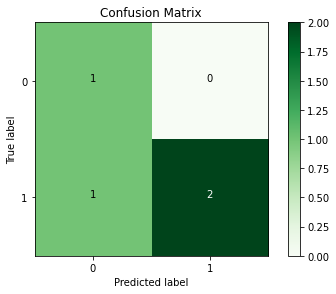

In [ ]:
classes = [0, 1]
# plot confusion matrix
plt.imshow(conf, interpolation='nearest', cmap=plt.cm.Greens)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
 
fmt = 'd'
thresh = conf.max() / 2.
for i, j in itertools.product(range(conf.shape[0]), range(conf.shape[1])):
    plt.text(j, i, format(conf[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf[i, j] > thresh else "black")
 
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [ ]:
# from the confusion matrix
TP = true_pos =1
TN = true_neg = 0
FP = false_pos = 1
FN = false_neg = 2

In [ ]:
results = {}
metric = "ACC"
results[metric] = (TP + TN) / (TP + TN + FP + FN)
print(f"{metric} is {results[metric]: .3f}")
# Sensitivity or Recall
# Sensitivity or Recall
metric = "TPR"
results[metric] = TP / (TP + FN)
print(f"{metric} is {results[metric]: .3f}")
# Specificity
metric = "TNR"
results[metric] = TN / (TN + FP)
print(f"{metric} is {results[metric]: .3f}")
# Precision
metric = "PPV"
results[metric] = TP / (TP + FP)
print(f"{metric} is {results[metric]: .3f}")
metric = "NPV"
results[metric] = TN / (TN + FN)
print(f"{metric} is {results[metric]: .3f}")
metric = "F1"
results[metric] = 2 / (1 / results["PPV"] + 1 / results["TPR"])
print(f"{metric} is {results[metric]: .3f}")
metric = "MCC"
num = TP * TN - FP * FN
den = ((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN)) ** 0.5
results[metric] = num / den
print(f"{metric} is {results[metric]: .3f}")

ACC is  0.250
TPR is  0.333
TNR is  0.000
PPV is  0.500
NPV is  0.000
F1 is  0.400
MCC is -0.577


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
 
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [ ]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [ ]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
 
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [ ]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

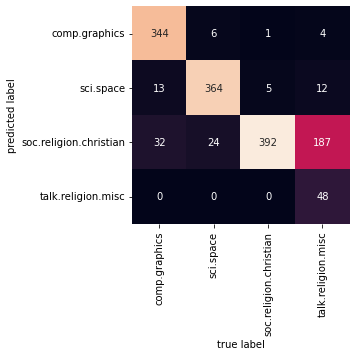

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [ ]:
 predict_category('sending a payload to the ISS')

'sci.space'

In [ ]:
predict_category('discussing islam vs atheism')

'soc.religion.christian'

In [ ]:
predict_category('determining the screen resolution')

'comp.graphics'

In [ ]:
# from the confusion matrix
TP = true_pos =344
TN = true_neg = 211
FP = false_pos = 45
FN = false_neg = 200

In [ ]:
results = {}
metric = "ACC"
results[metric] = (TP + TN) / (TP + TN + FP + FN)
print(f"{metric} is {results[metric]: .3f}")
# Sensitivity or Recall
# Sensitivity or Recall
metric = "TPR"
results[metric] = TP / (TP + FN)
print(f"{metric} is {results[metric]: .3f}")
# Specificity
metric = "TNR"
results[metric] = TN / (TN + FP)
print(f"{metric} is {results[metric]: .3f}")
# Precision
metric = "PPV"
results[metric] = TP / (TP + FP)
print(f"{metric} is {results[metric]: .3f}")
metric = "NPV"
results[metric] = TN / (TN + FN)
print(f"{metric} is {results[metric]: .3f}")
metric = "F1"
results[metric] = 2 / (1 / results["PPV"] + 1 / results["TPR"])
print(f"{metric} is {results[metric]: .3f}")
metric = "MCC"
num = TP * TN - FP * FN
den = ((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN)) ** 0.5
results[metric] = num / den
print(f"{metric} is {results[metric]: .3f}")

ACC is  0.694
TPR is  0.632
TNR is  0.824
PPV is  0.884
NPV is  0.513
F1 is  0.737
MCC is  0.426
